In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

In [3]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from gaussian_kde import gaussian_kde
from utility import display_components, display_pca_data, weighted_kde


In [4]:
import holoviews as hv
hv.notebook_extension()

from bqplot import (
    LogScale, LinearScale, OrdinalColorScale, ColorAxis,
    Axis, Scatter, Lines, CATEGORY10, Label, Figure, Tooltip, Hist
)

from ipywidgets import HBox, VBox, IntSlider, Play, jslink, Layout, Dropdown
import ipywidgets
%matplotlib inline

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [5]:
dataset_name = "W8_only"

In [6]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

BES_Panel (33502, 455)
BES_numeric (33502, 399)
var_type (455, 13)
BES_non_numeric (33502, 51)
BES_reduced (33502, 351)
BES_reduced_with_na (33502, 351)
Wall time: 7.19 s


In [7]:
Treatment = dataset_name

In [8]:
reduced_set_of_variables = False
if reduced_set_of_variables:

    corr_vars = ["efficacyPolCare__Strongly agree", "overseasAid__Strongly agree", "antiIntellectual__Strongly agree",
                 "refAreGood__Strongly agree","harkBack__Strongly agree", "happyEULeave__Extremely happy", "strongLeader__Strongly agree",
                 "blackEquality__Gone much too far", "gayEquality__Gone much too far", "femaleEquality__Gone much too far",
                 "immigSelf__Allow many more", "redistSelf__Government should be less concerned about equal incomes",
                 "gayMarriage__Strongly agree", "discrimBME__A lot of discrimination against",
                 "discrimWhite__A lot of discrimination against", "leftRight__Right", "radical__Strongly agree"]



    # efficacyPolCare__Strongly agree, overseasAid__Strongly agree, antiIntellectual__Strongly agree, refAreGood__Strongly agree
    # harkBack__Strongly agree, happyEULeave__Extremely happy, strongLeader__Strongly agree
    # blackEquality__Gone much too far, gayEquality__Gone much too far, femaleEquality__Gone much too far
    # immigSelf__Allow many more
    # redistSelf__Government should be less concerned about equal incomes


    Treatment = "Populism&ethno"
    specific_vars = [x for x in BES_reduced if re.match("al[1-5]|lr[1-5]|ethno[1-6]|populism[1-6]",x)]
    specific_vars.extend(corr_vars)


    BES_reduced = BES_reduced[specific_vars]
    BES_reduced_with_na = BES_reduced_with_na[specific_vars]
    specific_vars

In [9]:
# fulldata_withPP - all samples, no columns removed due to NAs, preprocessing for weasel answers
# procdata_withPP - light cleaning
# mostdata_withPP - imputation on reduced set, 2% least filled removed
# lessdata_withPP - imputation on reduced set (% lesast filled), but only retain 2/3 filled out data
# core_withPP - just the representative cross-section core


output_subfolder = BES_output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )

In [10]:
# normalise data (subtract out the mean, divide through by standard deviation)
clean_feature_set_std = StandardScaler().fit_transform(BES_reduced.values )
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_reduced.columns,
                             index   = BES_reduced.index      )

In [11]:
# (BES_Panel[ [x.split("__")[0] for x in BES_reduced.columns] ]=="Don't know").sum()

In [12]:
%%time
# 5 mins
## RUN (some variant of) PCA (potentially v slow!)
n_components = BES_std.shape[1]
# n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(svd_method = 'lapack',n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(BES_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_reduced.index)

Wall time: 6.99 s


In [13]:
# treatdir = BES_data_folder+Treatment
# subdir = BES_data_folder+Treatment+decomp_method
load_suff = "FactorAnalysis"
save = True # False => Load

if save & ( 'decomp' in globals() ): # SAVE    ##( 'decomp' not in globals() )
    decomp_method = str(decomp).split("(")[0] 
    subdir = output_subfolder + decomp_method
    fname = subdir+ os.sep + decomp_method
    # create dir, save decomp object, BES_decomp, BES_std    
    if not os.path.exists(subdir): os.makedirs(subdir)
    with open(fname+".pkl", "wb") as f: pickle.dump( decomp, f )
    BES_decomp.to_hdf(fname+".hdf"        , decomp_method)
    BES_std.to_hdf(   fname+"_std"+".hdf" , decomp_method)
    
else: # LOAD decomp results (default is SAVE)
    decomp_method = load_suff
    subdir = output_subfolder + os.sep + decomp_method    
    fname = subdir + os.sep + decomp_method
    if not os.path.exists(subdir): raise Exception(subdir + ' does not exist!')
    # load decomp object, BES_decomp, BES_std, n_components
    with open(fname+".pkl", "rb") as f: decomp = pickle.load(f) 
    BES_decomp = pd.read_hdf(fname+".hdf")
    BES_std    = pd.read_hdf(fname+"_std"+".hdf")
    n_components = decomp.components_.shape[0] 

In [14]:
# # %%time
# # import importlib.util
# # import utility
# # importlib.reload(utility)
# # from utility import display_components

# import imp; imp.reload(utility)
# del display_pca_data
# from utility import display_pca_data

average log-likelihood of all samples: -447.55313051692684
number of iterations: 2


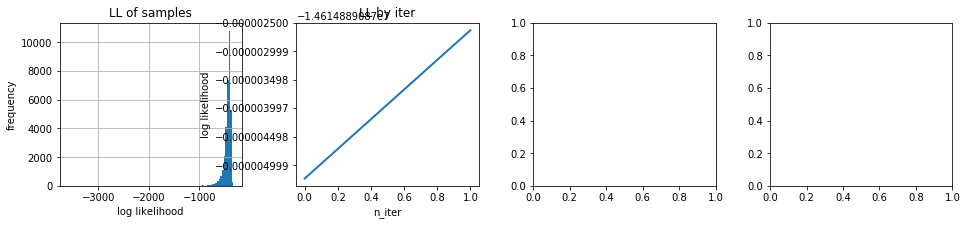

In [15]:
display_pca_data(n_components, decomp, BES_std)

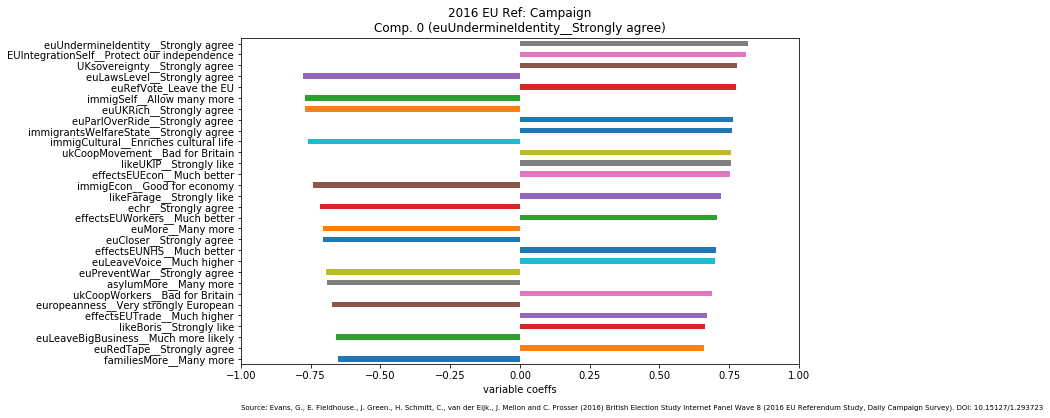

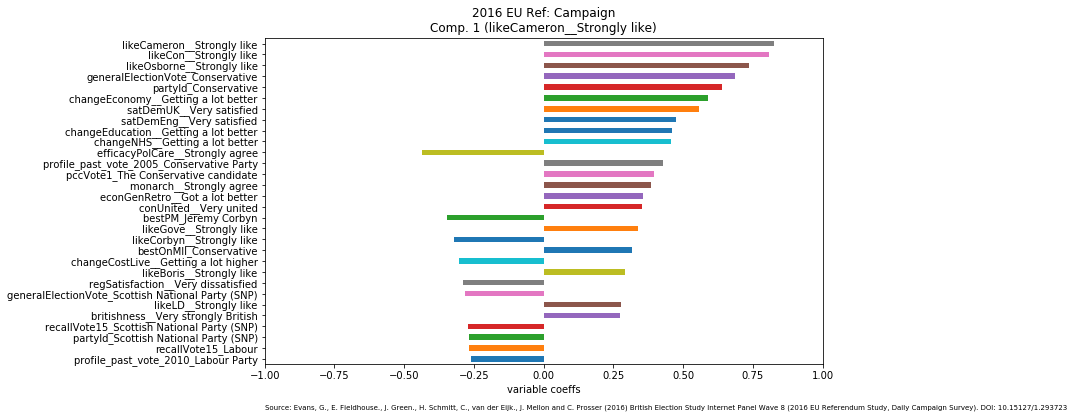

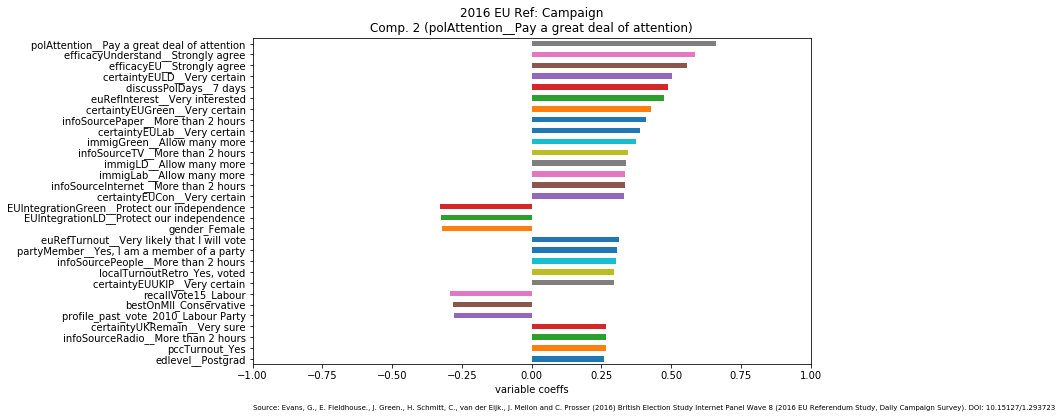

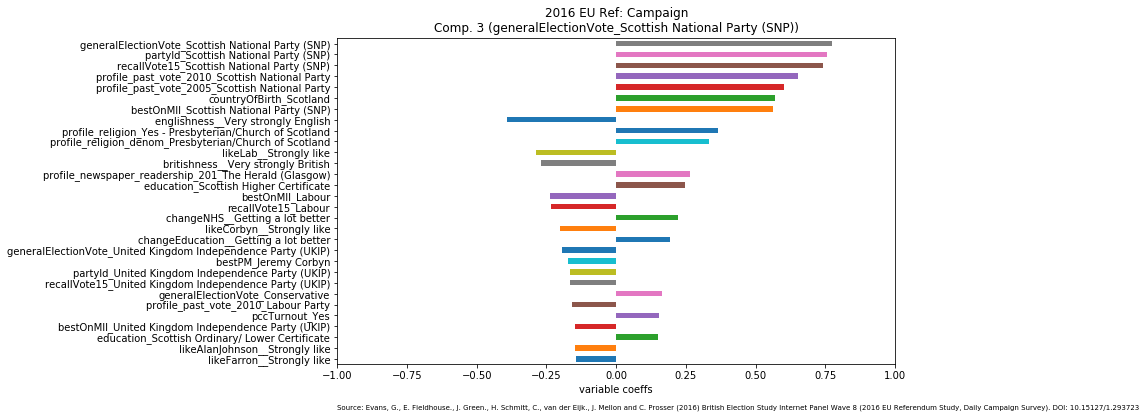

In [16]:
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          BES_reduced.columns, BES_decomp, manifest, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

In [91]:
# Comp 0: auth-pop-nat-left/lib-antipop-antinat-right
# note - indifferent about lr1 (redistribution) and ethon6/3/1 (shame/disappointment/room to learn)
# top lr variable lr5 ('trad local management/employee class conflict')

# Comp 1: left-antinat-lib-pop/right-nat-auth-antipop
# note - populism1 indifference - presumably related to specificity
# of "will of the people" re: Brexit
# also weaker response to lr5 ('trad local management/employee class conflict')

# Socially Liberal Libertarian (politicians beneath The People and Businesses and Personal Responsibility)
# Comp 2: pop-lib-right-antinat/antipop-auth-left-nat
# note - death penalty lowest in al variables, indifference to ethno6/3(shame/disappointment)
# but very keen on learning from other countries

In [26]:
# %time
# # BES_decomp[0].corrwith(BES_std)
# corr = BES_reduced.corrwith(BES_decomp[1],axis=0)
# corr

In [27]:
# corr.sort_values().hist(bins=50)

In [28]:
# corr[corr>.4].sort_values()

# # "gayMarriage__Strongly agree", "discrimBME__A lot of discrimination against"
# # "discrimWhite__A lot of discrimination against", "leftRight__Right", "radical__Strongly agree"

In [29]:
# populism = BES_numeric[[x for x in BES_numeric.columns if "populism" in x]].copy()
# for col in populism.columns:
#     populism[col] = populism[col].fillna(np.median(populism[col].dropna()))
# populism["total"] = populism.sum(axis=1)
# populism.columns

In [30]:
# ethno = BES_numeric[[x for x in BES_numeric.columns if "ethno" in x]].copy()
# for col in ethno.columns:
#     ethno[col] = ethno[col].fillna(np.median(ethno[col].dropna()))
#     if col in ['ethno1', 'ethno3', 'ethno6']: # flip to get consistent direction nationalism
#         ethno[col] = 4.0 - ethno[col]
# ethno["total"] = ethno.sum(axis=1)

In [31]:
# al_scale = BES_numeric["al_scale"].copy()
# al_scale = al_scale.fillna(np.median(al_scale.dropna()))
# al_cats = np.zeros(al_scale.shape)
# al_cats[al_scale>al_scale.quantile(1/3)] = 1
# al_cats[al_scale>al_scale.quantile(2/3)] = 2
# al_cats = pd.DataFrame(al_cats)

In [32]:
# sns.pointplot(x=ethno["total"].values, y=populism["total"].values, hue=al_cats[0].values);

In [33]:
# sns.pointplot(x=BES_numeric["lr_scale"].fillna(np.median(BES_numeric["lr_scale"].dropna())), y=populism["total"].values, hue=al_cats[0].values);

In [34]:
# BES_numeric[[x for x in BES_numeric.columns if "ethno" in x]].max()

noise_variance_
likeCon__Strongly like                                     0.286765
likeUKIP__Strongly like                                    0.305502
immigSelf__Allow many more                                 0.323994
EUIntegrationSelf__Protect our independence                0.328459
euUndermineIdentity__Strongly agree                        0.329664
effectsEUEcon__Much better                                 0.344447
likeCameron__Strongly like                                 0.347295
immigEcon__Good for economy                                0.347630
generalElectionVote_Scottish National Party (SNP)          0.348902
immigrantsWelfareState__Strongly agree                     0.352856
euRefVote_Leave the EU                                     0.356363
likeFarage__Strongly like                                  0.358968
immigCultural__Enriches cultural life                      0.363036
euUKRich__Strongly agree                                   0.366869
UKsovereignty__Strongly agree                              0.372766
asylumMore__Many more                                      0.382320
partyId_Scottish National Party (SNP)                      0.383442
likeLab__Strongly like                                     0.384449
euMore__Many more                                          0.384630
euLawsLevel__Strongly agree                                0.394418
recallVote15_Scottish National Party (SNP)                 0.402165
likeCorbyn__Strongly like                                  0.404264
partyId_Conservative                                       0.407940
euParlOverRide__Strongly agree                             0.408382
ukCoopMovement__Bad for Britain                            0.408952
generalElectionVote_United Kingdom Independence...         0.413647
effectsEUWorkers__Much better                              0.418468
likeBoris__Strongly like                                   0.419809
familiesMore__Many more                                    0.421918
euLeaveVoice__Much higher                                  0.441811
...                                                             ...
profile_ethnicity_Black Caribbean                          0.941147
registered_Yes - another address                           0.941411
profile_newspaper_readership_201_The Scotsman              0.941699
education_City and Guild certificate - advanced            0.943111
profile_ethnicity_Other ethnic group                       0.946624
education_Recognised trade apprenticeship compl...         0.947147
euMIISmall_Social identity/partisanship                    0.947421
profile_newspaper_readership_201_The Daily Star...         0.948174
profile_ethnicity_Any other mixed background               0.951186
profile_newspaper_readership_201_The Financial ...         0.951201
recallVote15_British National Party (BNP)                  0.951595
euMIISmall_British/english identity                        0.952066
profile_religion_Yes - Orthodox Christian                  0.952945
marital_Separated (after being married)                    0.953006
bestOnMII_Other party                                      0.953417
euMIISmall_EU spending/regulations/cost                    0.953788
marital_Civil Partnership                                  0.955825
housing_Own (part-own) through shared ownership...         0.956816
euMIISmall_Other stability or uncertainty concern          0.957309
countryOfBirth_Northern Ireland                            0.957463
profile_ethnicity_White and Asian                          0.959615
education_onc                                              0.960147
education_Youth training certificate/skillseekers          0.960383
euMIISmall_EU integration/stability                        0.961041
euMIISmall_Family                                          0.962669
profile_religion_Yes - Evangelical /independent...         0.963040
profile_ethnicity_White and Black African                  0.964245
profile_ethnicity_Any other black backgr

noise_variance_
bestOnMII_Other party                                      0.953417
countryOfBirth_Northern Ireland                            0.957463
countryOfBirth_Republic of Ireland                         0.922001
education_CSE grades 2-5                                   0.926007
education_City and Guild certificate                       0.914947
education_City and Guild certificate - advanced            0.943111
education_Clerical and commercial                          0.927169
education_Nursing qualification (eg SEN, SRN, S...         0.913336
education_Recognised trade apprenticeship compl...         0.947147
education_Scottish Ordinary/ Lower Certificate             0.925817
education_Teaching qualification (not degree)              0.927106
education_University diploma                               0.925764
education_Youth training certificate/skillseekers          0.960383
education_onc                                              0.960147
euGovtLeaflet_Yes, received but not read it                0.927944
euKnow3_False                                              0.920232
euKnow4_False                                              0.905875
euMIISmall_British/english identity                        0.952066
euMIISmall_Campaign/outcome fairness                       0.926293
euMIISmall_EU integration/stability                        0.961041
euMIISmall_EU spending/regulations/cost                    0.953788
euMIISmall_Family                                          0.962669
euMIISmall_Foreign policy                                  0.924089
euMIISmall_No content to reason                            0.936422
euMIISmall_Other stability or uncertainty concern          0.957309
euMIISmall_Social identity/partisanship                    0.947421
euRefFinal_There might be a second referendum              0.923855
gor_East Midlands                                          0.909747
gor_North East                                             0.925744
gor_West Midlands                                          0.906081
...                                                             ...
marital_Civil Partnership                                  0.955825
marital_Separated (after being married)                    0.953006
marital_Widowed                                            0.907051
pccVote1_The Green candidate                               0.912833
profile_ethnicity_Any other Asian background               0.936210
profile_ethnicity_Any other black background               0.964291
profile_ethnicity_Any other mixed background               0.951186
profile_ethnicity_Black African                            0.902701
profile_ethnicity_Black Caribbean                          0.941147
profile_ethnicity_Other ethnic group                       0.946624
profile_ethnicity_White and Asian                          0.959615
profile_ethnicity_White and Black African                  0.964245
profile_ethnicity_White and Black Caribbean                0.966573
profile_newspaper_readership_201_Other Newspaper           0.916844
profile_newspaper_readership_201_Other local da...         0.937627
profile_newspaper_readership_201_The Daily Star...         0.948174
profile_newspaper_readership_201_The Express               0.937029
profile_newspaper_readership_201_The Financial ...         0.951201
profile_newspaper_readership_201_The Independent           0.931341
profile_newspaper_readership_201_The Scotsman              0.941699
profile_past_vote_2005_Veritas                             0.969409
profile_religion_Yes - Evangelical /independent...         0.963040
profile_religion_Yes - Free Presbyterian                   0.904983
profile_religion_Yes - Orthodox Christian                  0.952945
profile_religion_Yes - Other                               0.924755
profile_religion_Yes - Pentecostal                         0.932317
profile_religion_denom_Free Presbyterian                   0.906447
recallVote15_British National Party (BNP

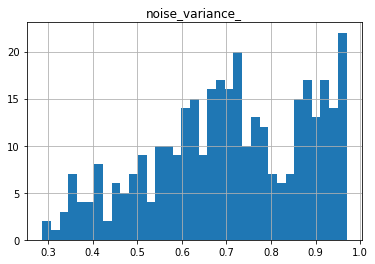

In [17]:
# SUPER USEFUL FOR FEATURE EXTRACTION/VARIABLE PREP!

if hasattr(decomp, 'noise_variance_'):
    if not isinstance(decomp.noise_variance_, float):
        NoiseVariance = pd.DataFrame( decomp.noise_variance_ , index = BES_std.columns, columns = ["noise_variance_"])
        NoiseVariance.hist( bins = int(len( NoiseVariance )/10) )
        NoiseVariance = NoiseVariance.sort_values(by="noise_variance_")
        display( NoiseVariance )
        display( NoiseVariance[ NoiseVariance["noise_variance_"]>.9 ].sort_index() )

In [18]:
x_axis = 0
y_axis = 1

xlim = np.floor( BES_decomp.loc[ :, x_axis ].min() ), np.ceil( BES_decomp.loc[ :, x_axis ].max() )
ylim = np.floor( BES_decomp.loc[ :, y_axis ].min() ), np.ceil( BES_decomp.loc[ :, y_axis ].max() )

# SparsePCA
if decomp_method == 'SparsePCA':
    xlim =  BES_decomp.loc[ :, x_axis ].min() ,  BES_decomp.loc[ :, x_axis ].max() 
    ylim =  BES_decomp.loc[ :, y_axis ].min() ,  BES_decomp.loc[ :, y_axis ].max() 

In [101]:
# # returns = np.log(prices[1:]) - np.log(prices[:-1])
# hist_x = LinearScale()
# hist_y = LinearScale()
# hist = Hist(sample=comp["comp_absmag"], scales={'sample': hist_x, 'count': hist_y}, bins=30)

# hist_x.min=0
# hist_x.max=1

# h_xax = Axis(scale=hist_x, label='abs. variable coeffs', grids='off', set_ticks=True)
# h_yax = Axis(scale=hist_y, label='Freq', orientation='vertical', grid_lines='none')

# layout=ipywidgets.Layout(min_width='1000px', min_height='200px')

# fig_hist = Figure( marks=[hist], axes=[h_xax, h_yax], title='histogram of abs. variable coeffs',
#                    layout = layout, min_height='200px', preserve_aspect=False )
# fig_hist

In [19]:
from bqplot import DateScale, LinearScale, OrdinalScale, Axis, Lines, Scatter, Bars, Hist, Figure

comp_slider = IntSlider(min=0, max=19, step=1, description='Component', value=0)
def comp_changed(change):
    comp = comp_dict[comp_slider.value]
    fig_lasso.title = "Comp. "+str(comp_slider.value)+" (" + comp.index[-1:][0] + ")"
    bar_lasso.x = comp["components_"].tail(30).index
    bar_lasso.y = comp["components_"].tail(30).values
    
comp_slider.observe(comp_changed, 'value')

comp = comp_dict[0]
x = comp["components_"].tail(30).index
y = comp["components_"].tail(30).values



title = "Comp. "+str(comp_slider.value)+" (" + comp.index[-1:][0] + ")"

xs, ys = OrdinalScale(), LinearScale()
ys.min = -1
ys.max = 1

data = np.arange(20)
bar_lasso = Bars(x=x, y=y, scales={'x': xs, 'y': ys}, orientation='horizontal',font_size = '30px')
xax_lasso = Axis(scale=xs, orientation='vertical')
yax_lasso = Axis(scale=ys, label='variable coeffs', orientation='horizontal')
fig_margin = dict(top=60, bottom=60, left=320, right=60)
layout=ipywidgets.Layout(min_width='1000px', min_height='600px')
fig_lasso = Figure(marks=[ bar_lasso], axes=[xax_lasso, yax_lasso],
                   title=title, fig_margin = fig_margin,
                   layout=layout)


box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='center')

VBox([ fig_lasso,  comp_slider ], layout = box_layout)

In [24]:
default_value = 'al_scale__Right'
if default_value not in BES_reduced.columns:
    lr_scale_var_list = [x for x in BES_reduced.columns if 'al_scale' in x]
    if len(lr_scale_var_list) > 0:
        default_value = lr_scale_var_list[0]
    else:
        default_value = BES_reduced.columns[0]

value_selector = Dropdown(
    options=list( BES_reduced.columns ),
    value= default_value,
    description='BES Variable:',
    disabled=False,
    button_style='' # 'success', 'info', 'warning', 'danger' or ''
)

def value_changed(change):
    print(value_selector.value)
#     comp = comp_dict[comp_slider.value]
#     fig_lasso.title = "Comp. "+str(comp_slider.value)+" (" + comp.index[-1:][0] + ")"
#     bar_lasso.x = comp["components_"].tail(30).index
#     bar_lasso.y = comp["components_"].tail(30).values
    
value_selector.observe(value_changed, 'value')
value_selector

Dropdown(description='BES Variable:', options=('partyIdStrength__Not very strong', 'partyIdEU__Mainly leave', …

euMIISmall_Sovereignty/EU bureaucracy


In [22]:
from bqplot import *
sc_x = LinearScale()
sc_y = LinearScale()
sc_col = ColorScale(colors=['red', 'white', 'green'], mid=0.0)
decomp_label_col = value_selector.value
size = 100

x_data = BES_decomp.loc[ :, x_axis ]
y_data = BES_decomp.loc[ :, y_axis ]

scatt_1 = Scatter(x=x_data,
                  y=y_data[:50],
                  color=BES_reduced.loc[BES_decomp.index,decomp_label_col].values,
                  scales={'x': sc_x, 'y': sc_y, 'color': sc_col})
scatt_2 = Scatter(x=x_data, y=y_data[:50] * 2, color=y_data[:50] * 2, scales={'x': sc_x, 'y': sc_y, 'color': sc_col}, 
               preserve_domain={'color': True}, marker='cross')

ax_x = Axis(scale=sc_x)
ax_y = Axis(scale=sc_y, orientation='vertical')
Figure(marks=[scatt_1, scatt_2], axes=[ax_x, ax_y])

Figure(axes=[Axis(scale=LinearScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top':…

In [105]:
# BES_decomp_with_na = BES_decomp
# BES_decomp_with_na[ BES_reduced_with_na.isnull().values ] = np.nan

In [106]:
gc.collect()

121

In [107]:
# BES_decomp

In [108]:
# BES_decomp_with_na

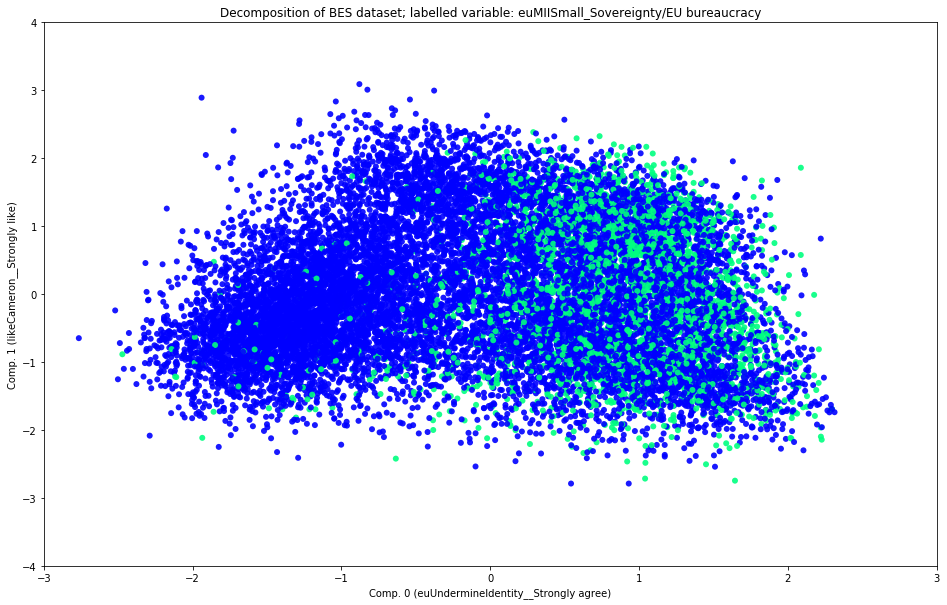

In [28]:
# for ordinal categorical
# winter, autumn
%matplotlib inline
cmap_name = "winter"
decomp_label_col = value_selector.value
label_stub = decomp_label_col.split("__")[0]

fig = plt.figure( figsize=(16,10) )
plt.scatter(BES_decomp.loc[ :, x_axis ],
            BES_decomp.loc[ :, y_axis ],
            cmap = plt.get_cmap(cmap_name),
            c = BES_reduced_with_na.loc[BES_decomp.index,decomp_label_col].values,
            edgecolor = "None",
            alpha = 0.9) #            edgecolors=col,

plt.xlim(xlim) #cats
plt.ylim(ylim)
if label_stub in cat_dictionary.keys():
    cats = cat_dictionary[ label_stub ]
    labels = ( cats[0], str(0), cats[-1], str(len( cats ) - 1) )
    plt.colorbar().set_label('{} = {}, {} = {}'.format(*labels))
plt.title( 'Decomposition of BES dataset; labelled variable: ' + decomp_label_col )
plt.xlabel( comp_labels[x_axis] )
plt.ylabel( comp_labels[y_axis] ) 
plt.show()

fig.savefig( output_subfolder + decomp_method+ os.sep +label_stub.replace("/","")+".png", bbox_inches='tight' )

In [23]:
# # for ordinal categorical
# # winter, autumn
# cmap_name = "winter"
# decomp_label_col = 'al_scale__Authoritarian'
# label_stub = decomp_label_col.split("__")[0]

# fig = plt.figure( figsize=(16,10) )
# plt.scatter(BES_decomp.loc[ :, x_axis ],
#             BES_decomp.loc[ :, y_axis ],
#             cmap = plt.get_cmap(cmap_name),
#             c = BES_reduced.loc[BES_decomp.index,decomp_label_col].values,
#             edgecolor = "None",
#             alpha = 0.9) #            edgecolors=col,

# plt.xlim(xlim)
# plt.ylim(ylim)

# cats = cat_dictionary[ label_stub ]
# labels = ( cats[0], str(0), cats[-1], str(len( cats ) - 1) )
# plt.colorbar().set_label('{} = {}, {} = {}'.format(*labels))
# plt.title( 'Decomposition of BES dataset; labelled variable: ' + decomp_label_col )
# plt.xlabel( comp_labels[x_axis] )
# plt.ylabel( comp_labels[y_axis] ) 
# plt.show()

# fig.savefig( BES_data_folder+Treatment+decomp_method+label_stub+".png", bbox_inches='tight' )

In [25]:
# # who are the "improbables"?

# if hasattr(decomp, 'score_samples'):
#     most_likely = pd.DataFrame(decomp.score_samples(BES_std)).quantile(.999).values[0]
#     least_likely = pd.DataFrame(decomp.score_samples(BES_std)).quantile(.001).values[0]
#     print("least likely")
#     display(BES_num_and_cat.loc[ BES_reduced.index[decomp.score_samples(BES_std)<least_likely] ])
# # who are the "stereotypes"?
#     print("most likely")
#     display(BES_num_and_cat.loc[ BES_reduced.index[decomp.score_samples(BES_std)>most_likely ] ])
# # check to see balance of missing values!

In [26]:
###### CLUSTERING ##############

In [27]:

# affinity_propagation = cluster.AffinityPropagation(damping=.9,
#                                                    preference=-200)

# affinity_propagation.fit(X[:,0:2])

# dbscan = cluster.DBSCAN(eps=.2)
# dbscan.fit(X)

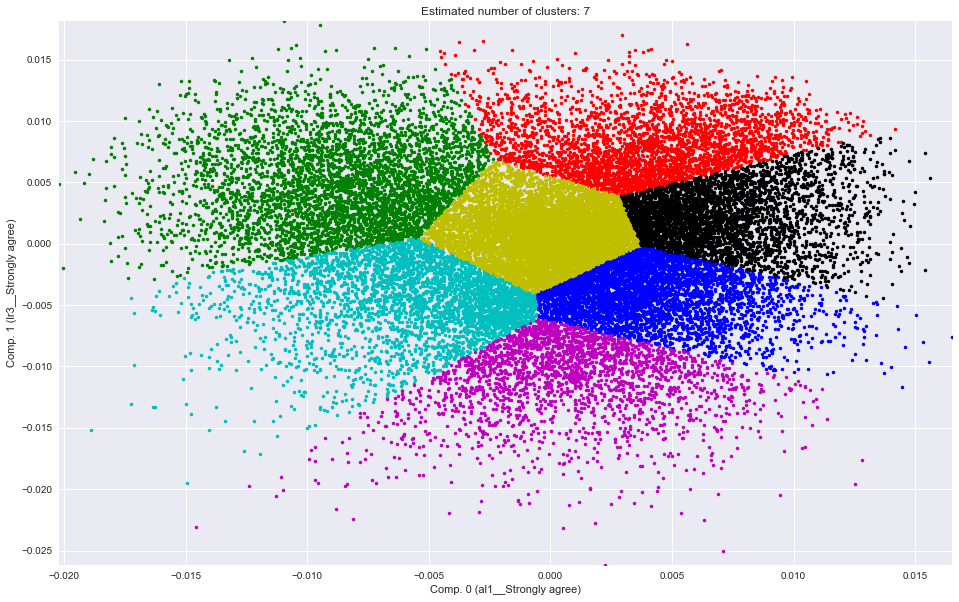

In [78]:
from sklearn import cluster
X = X_r

two_means = cluster.MiniBatchKMeans(n_clusters=7)
two_means.fit(X)

labels = two_means.labels_
cluster_centers = two_means.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

fig = plt.figure( figsize=(16,10) )
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, x_axis], X[my_members, y_axis], col + '.')
    plt.plot(cluster_center[x_axis], cluster_center[y_axis], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
plt.xlim(xlim)
plt.ylim(ylim)
    
plt.xlabel( comp_labels[x_axis] )
plt.ylabel( comp_labels[y_axis] ) 
plt.title('Estimated number of clusters: %d' % n_clusters_)

In [29]:
import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    """Perform K-Means clustering on data with missing values.

    Args:
      X: An [n_samples, n_features] array of data to cluster.
      n_clusters: Number of clusters to form.
      max_iter: Maximum number of EM iterations to perform.

    Returns:
      labels: An [n_samples] vector of integer labels.
      centroids: An [n_clusters, n_features] array of cluster centroids.
      X_hat: Copy of X with the missing values filled in.
    """

    # Initialize missing values to their column means
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            # initialize KMeans with the previous set of centroids. this is much
            # faster and makes it easier to check convergence (since labels
            # won't be permuted on every iteration), but might be more prone to
            # getting stuck in local minima.
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            # do multiple random initializations in parallel
            cls = KMeans(n_clusters, n_jobs=-1)

        # perform clustering on the filled-in data
        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        # fill in the missing values based on their cluster centroids
        X_hat[missing] = centroids[labels][missing]

        # when the labels have stopped changing then we have converged
        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat

In [30]:
labels, centroids, X_hat = kmeans_missing(BES_reduced_with_na, n_clusters=5)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\cluster\k_means_.py:893: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [31]:
gc.collect()

6

number of estimated clusters : 1
Wall time: 1.82 s


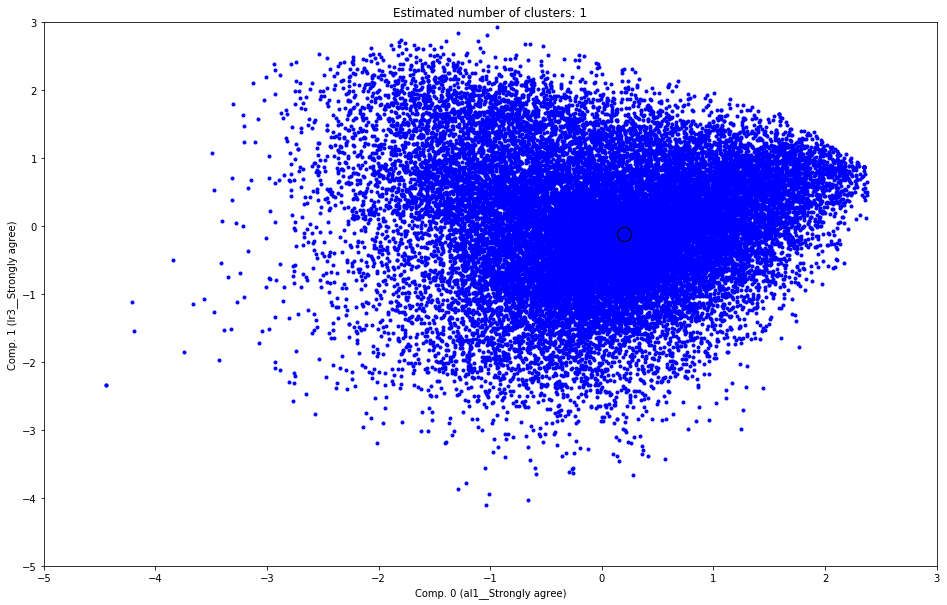

In [35]:
%%time
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

X = X_r

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


fig = plt.figure( figsize=(16,10) )
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, x_axis], X[my_members, y_axis], col + '.')
    plt.plot(cluster_center[x_axis], cluster_center[y_axis], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
plt.xlim(xlim)
plt.ylim(ylim)
    
plt.xlabel( comp_labels[x_axis] )
plt.ylabel( comp_labels[y_axis] ) 
plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.show()

fig.savefig(output_subfolder + decomp_method+ os.sep +"Cluster_estimation.png",bbox_inches='tight')


In [35]:
colours = cycle('ycmkgbr')
markers = cycle('v^<>,oD*x+')

cat_col_mar_dict = {} # category-colour-marker dictionary
# basic set of common ones! 
cat_col_mar_dict['Conservative'] = ('b', '.')
cat_col_mar_dict['Conservative Party'] = ('b', '.')
cat_col_mar_dict['The Conservative candidate']       = ('b', '.')
cat_col_mar_dict['Labour']       = ('r', '.')
cat_col_mar_dict['Labour Party']       = ('r', '.')
cat_col_mar_dict['The Labour candidate']       = ('r', '.')
cat_col_mar_dict['Green Party']  = ('g', '.')
cat_col_mar_dict['The Green candidate']       = ('g', '.')
cat_col_mar_dict['Plaid Cymru']  = ('k', '.')
cat_col_mar_dict['The Plaid Cymru candidate']  = ('k', '.')
cat_col_mar_dict['Scottish National Party']           = ('c', '.')
cat_col_mar_dict['United Kingdom Independence Party'] = ('m', '.')
cat_col_mar_dict['The UKIP candidate'] = ('m', '.')
cat_col_mar_dict['Liberal Democrat']                         = ('orange', '.')
cat_col_mar_dict['Liberal Democrats']                        = ('orange', '.')
cat_col_mar_dict['The Liberal Democrat candidate']                         = ('orange', '.')

In [34]:
# BES_reduced.columns

In [35]:
# BES_Panel["riskScale"]

In [36]:
# [ x for x in BES_reduced.columns if re.match(decomp_label_col + "(__)?", x) ]

# # re.match(decomp_label_col + "__", )

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


personality_agreeableness
personality_conscientiousness
personality_extraversion
personality_neuroticism
personality_openness


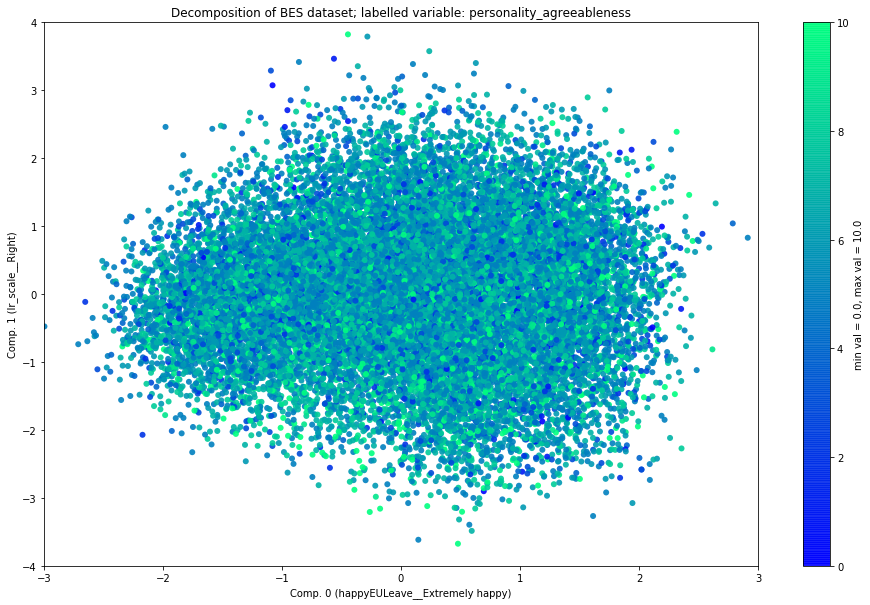

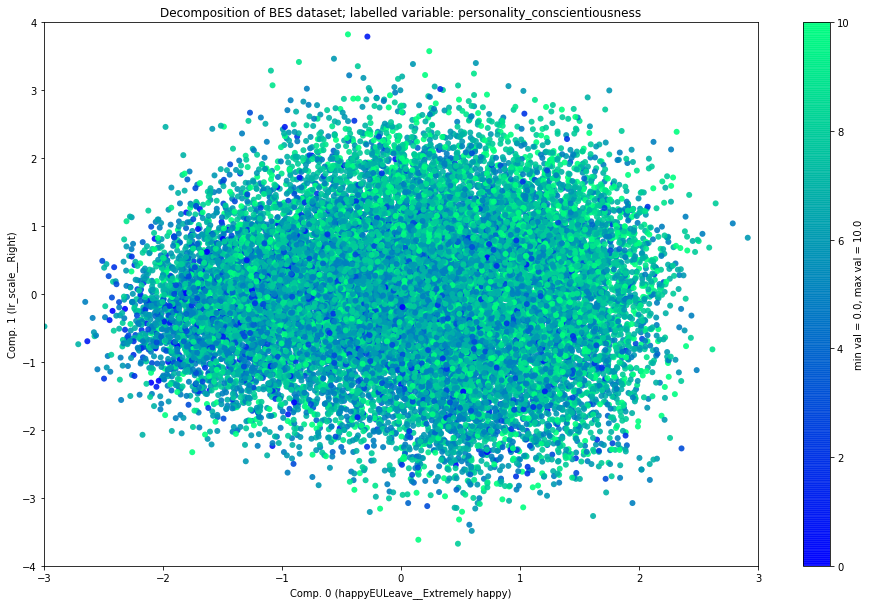

In [24]:
# %%time

graph_type = "ordinal_scatter/"
folder = output_subfolder + decomp_method +os.sep+ graph_type
if not os.path.exists(folder):
    os.makedirs(folder)
    

cmap_name = "winter"
    
dummy_list = var_type[ [ x in [ 0, 1, 2, 5, 6 ] for x in var_type["type"]  ] ].index # 0, 1, 2, 5, 6.index # ordinal variables

# ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:

#     if decomp_label_col in ["profile_religion","country",
#                             'polKnowMay','polKnowOsborne',
#                             'polKnowClegg', 'polKnowBercow',
#                             'polKnowMiliband', 'registered', 'ns_sec']:
#         continue
    
    fig = plt.figure( figsize=(16,10) )

#     # go through all the variables that have been created from base variables through transformation
#     # for ordinal variables, these should only ever be unique matches (unlike non-ordinals)
#     decomp_label_categories = [ x for x in BES_reduced.columns if re.match(decomp_label_col + "_?_?", x) ]
#     if len(decomp_label_categories) == 0: # removed during transformation/reduction
#         continue
#     elif len(decomp_label_categories) > 1:
#         raise Exception('len(decomp_label_categories) > 1 !!!')
#     # c = BES_reduced.loc[BES_decomp.index,decomp_label_col].values,
    
    #### NEEDS FIXING!!!
    
    if (decomp_label_col not in BES_reduced.columns):
        if decomp_label_col in new_old_col_names.keys(): # variable renamed in transformation
            decomp_label_categories = new_old_col_names[decomp_label_col]
        else:
            continue ## variable removed in transformation
    else:
        decomp_label_categories = decomp_label_col
    
    label_stub = decomp_label_col

    plt.scatter(BES_decomp.loc[ :, x_axis ],
                BES_decomp.loc[ :, y_axis ],
                cmap = plt.get_cmap(cmap_name),
                c = BES_reduced_with_na.loc[ BES_decomp.index , decomp_label_categories],
                edgecolor = "None",
                alpha = 0.9) #            edgecolors=col,

    plt.xlim(xlim)
    plt.ylim(ylim)

    # get category labels for categorical variables
    if var_type.loc[label_stub,"type"] in [ 1, 2, 5 ]: #6 already numerical
        cats = cat_dictionary[ label_stub ]
        labels = ( cats[0], str(0), cats[-1], str(len( cats ) - 1) )
    elif var_type.loc[label_stub,"type"] in [ 0, 6 ]:
        vals = BES_reduced.loc[ BES_decomp.index , decomp_label_categories]
        labels = ( "min val", min(vals), "max val", max(vals) )
    else:
        raise Exception('var_type not in [ 0, 1, 2, 5, 6]')
        
    plt.colorbar().set_label('{} = {}, {} = {}'.format(*labels))
    plt.title( 'Decomposition of BES dataset; labelled variable: ' + decomp_label_col )
    plt.xlabel( comp_labels[x_axis] )
    plt.ylabel( comp_labels[y_axis] ) 
#     plt.show()
    print(decomp_label_col)
    fig.savefig( folder+decomp_label_col, bbox_inches='tight' )
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1
#     print(fig_no)

Wall time: 43.7 s


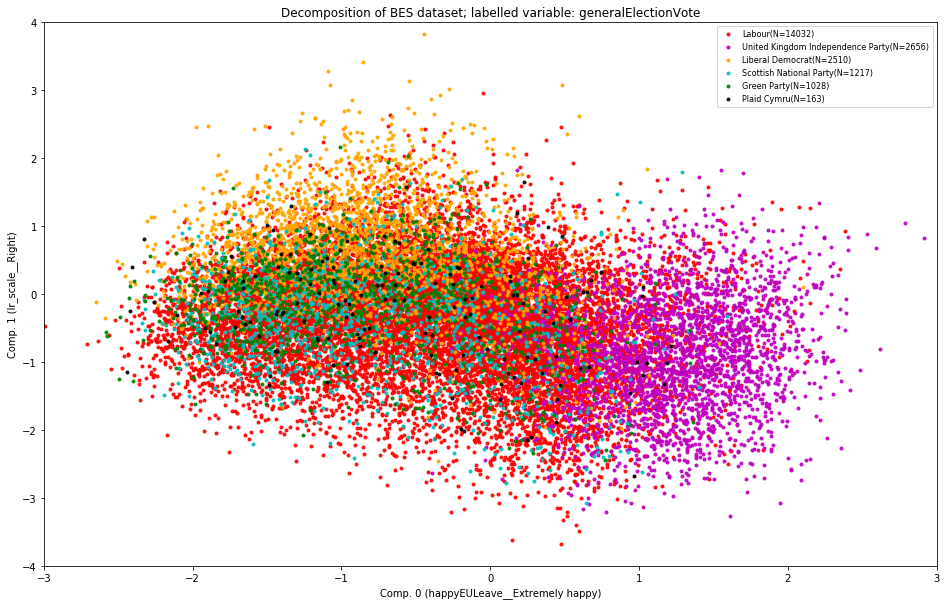

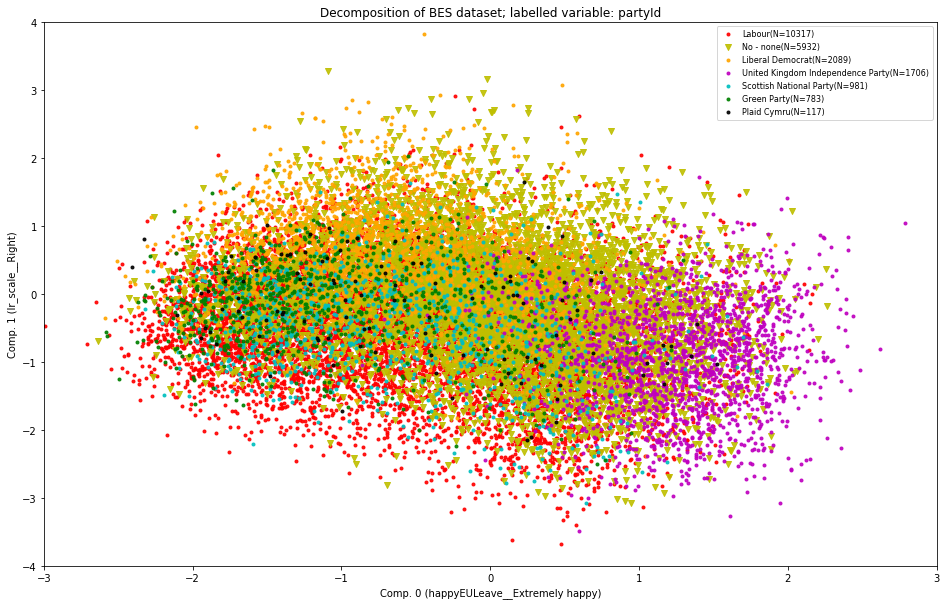

In [38]:
%%time

graph_type = "non_ordinal_scatter/"
folder = output_subfolder + decomp_method +os.sep+ graph_type
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = var_type[ var_type["type"]==3 ].index

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered', 'ns_sec']:
        continue
    
    fig = plt.figure( figsize=(16,10) )

    decomp_label_categories = [ x for x in BES_reduced_with_na.columns if (decomp_label_col + "_") in x ]
    if len(decomp_label_categories) == 0:
        continue
        
#     if (decomp_label_col not in BES_reduced.columns):
#         if decomp_label_col in new_old_col_names.keys(): # variable renamed in transformation
#             decomp_label_categories = new_old_col_names[decomp_label_col]
#         else:
#             continue ## variable removed in transformation
#     else:
#         decomp_label_categories = decomp_label_col        

    # 'No party is best able to handle this issue'
    drop_cat_list = ['profile_education_age', 'profile_ethnicity_White British']
    for drop_cat in drop_cat_list:
        if drop_cat in decomp_label_categories:
            decomp_label_categories.remove(drop_cat)
            
    replace_dict = {'Scottish National Party (SNP)' : 'Scottish National Party',
                    'United Kingdom Independence Party (UKIP)' : 'United Kingdom Independence Party'}

    lab_to_cat = {}
    sample_sizes = {}
    for cat in decomp_label_categories:
        
        lab = re.search('_([^_]+)$',cat).groups()[0]
        if lab in replace_dict.keys(): # replace party name variants with single version
            lab = replace_dict[lab]
        
        if lab not in cat_col_mar_dict.keys(): # try to give parties consistent colour, marker pairs
            cat_col_mar_dict[lab] = (next(colours),next(markers))
        
        sample_sizes[lab] = sum( BES_reduced_with_na[ cat ]==1 )
        lab_to_cat[lab] = cat

    for lab in sorted(sample_sizes, key=sample_sizes.get, reverse=True):
        
        samp = sample_sizes[lab]
            
        (col, mar) = cat_col_mar_dict[lab]

        cat_entries = BES_reduced_with_na[ lab_to_cat[lab] ]==1
        
        plt.scatter(BES_decomp.loc[ cat_entries, x_axis ],
                    BES_decomp.loc[ cat_entries, y_axis ],
                    c= col,
                    marker=mar,
                    label=lab + "(N="+str(samp)+")",
                    edgecolors=col,
                    alpha = .9 )
    
    plt.xlim(xlim)
    plt.ylim(ylim)    
    
    plt.xlabel( comp_labels[x_axis] )
    plt.ylabel( comp_labels[y_axis] ) 
    plt.legend(prop={'size':8})
    plt.title('Decomposition of BES dataset; labelled variable: ' + decomp_label_col)
    
    fig.savefig( folder+decomp_label_col, bbox_inches='tight' )
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1

In [33]:
Leaver = BES_Panel["euRefVote"]=="Leave the EU"

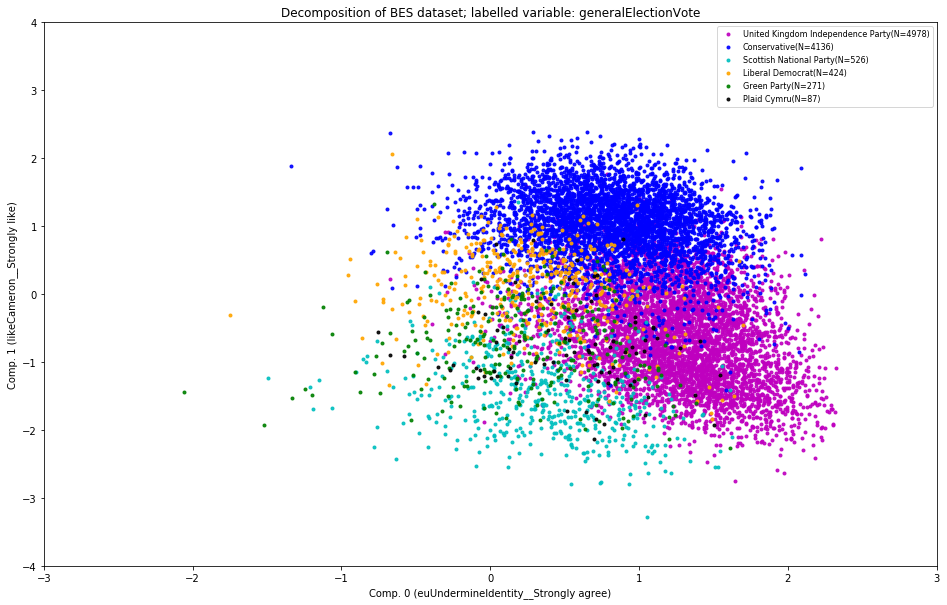

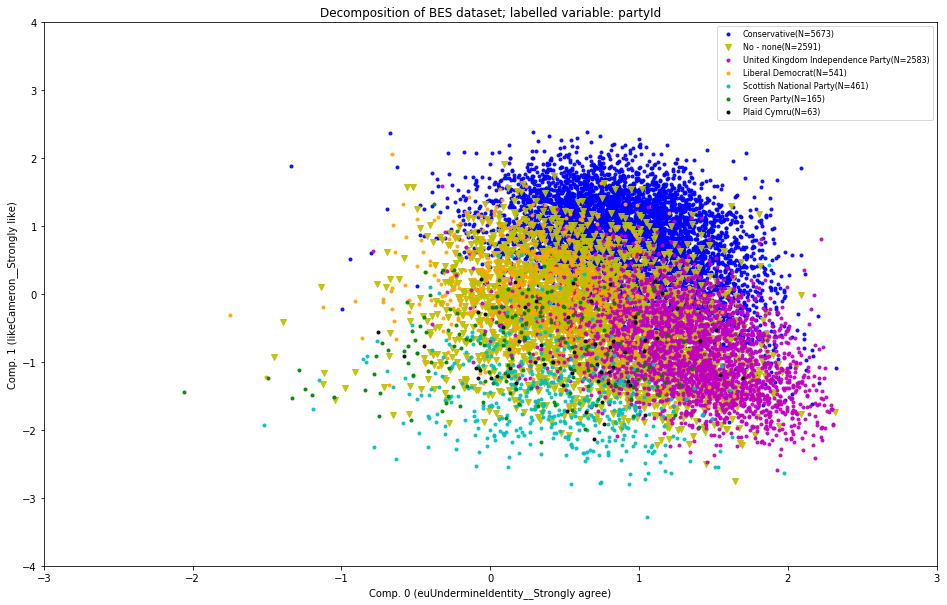

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

In [36]:
# %%time

graph_type = "non_ordinal_scatter/"
folder = output_subfolder + decomp_method +os.sep+  graph_type + os.sep + "Leavers_only"
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = var_type[ var_type["type"]==3 ].index

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered', 'ns_sec']:
        continue
    
    fig = plt.figure( figsize=(16,10) )

    decomp_label_categories = [ x for x in BES_reduced_with_na.columns if (decomp_label_col + "_") in x ]
    if len(decomp_label_categories) == 0:
        continue
        
#     if (decomp_label_col not in BES_reduced.columns):
#         if decomp_label_col in new_old_col_names.keys(): # variable renamed in transformation
#             decomp_label_categories = new_old_col_names[decomp_label_col]
#         else:
#             continue ## variable removed in transformation
#     else:
#         decomp_label_categories = decomp_label_col        

    # 'No party is best able to handle this issue'
    drop_cat_list = ['profile_education_age', 'profile_ethnicity_White British']
    for drop_cat in drop_cat_list:
        if drop_cat in decomp_label_categories:
            decomp_label_categories.remove(drop_cat)
            
    replace_dict = {'Scottish National Party (SNP)' : 'Scottish National Party',
                    'United Kingdom Independence Party (UKIP)' : 'United Kingdom Independence Party'}

    lab_to_cat = {}
    sample_sizes = {}
    for cat in decomp_label_categories:
        
        lab = re.search('_([^_]+)$',cat).groups()[0]
        if lab in replace_dict.keys(): # replace party name variants with single version
            lab = replace_dict[lab]
        
        if lab not in cat_col_mar_dict.keys(): # try to give parties consistent colour, marker pairs
            cat_col_mar_dict[lab] = (next(colours),next(markers))
        
        sample_sizes[lab] = sum( BES_reduced_with_na[ cat ][Leaver]==1 )
        lab_to_cat[lab] = cat

    for lab in sorted(sample_sizes, key=sample_sizes.get, reverse=True):
        
        samp = sample_sizes[lab]
            
        (col, mar) = cat_col_mar_dict[lab]

        cat_entries = BES_reduced_with_na[ lab_to_cat[lab] ]==1
        
        plt.scatter(BES_decomp.loc[ cat_entries, x_axis ][Leaver],
                    BES_decomp.loc[ cat_entries, y_axis ][Leaver],
                    c= col,
                    marker=".",
                    
                    label=lab + "(N="+str(samp)+")",
                    edgecolors=col,
                    alpha = .9 )
    
    plt.xlim(xlim)
    plt.ylim(ylim)    
    
    plt.xlabel( comp_labels[x_axis] )
    plt.ylabel( comp_labels[y_axis] ) 
    plt.legend(prop={'size':8})
    plt.title('Decomposition of BES dataset; labelled variable: ' + decomp_label_col)
    
    fig.savefig( folder+decomp_label_col, bbox_inches='tight' )
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1

In [37]:
folder

'../BES_analysis_output/W8_only\\FactorAnalysis\\non_ordinal_scatter/\\Leavers_only'

In [39]:
# col = "euRefVote"

# df = BES_decomp.loc[ : , [x_axis,y_axis] ].copy()
# max_cols = 4

# # reduce length of subcategories
# cats = list(cat_dictionary[col])
# for catno in range( len( cats ) ):

#     words = cats[catno].split(" ")
#     word_array = np.array( [len(x) for x in words] ) + 1
#     max_words = np.where( np.cumsum( word_array )<25 )[0].max()
#     cats[catno] = " ".join( words[0:max_words+1] )


# # add a category column to split the graphs on
# df[col] = BES_numeric[col].astype('category').cat.rename_categories( cats )

# # add N=??? sample size to each category type!
# sample_sizes = df[col].value_counts().loc[cats].values
# cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
# df[col].cat.rename_categories( cat_plus_sample_sizes, inplace=True )

# # formatting
# n_cols = len(df[col].dropna().unique())
# n_rows = np.ceil(n_cols/max_cols)
# col_wrap = min(max_cols,n_cols)
# size = 13.5/col_wrap

# # make the actual graphs
# g = sns.FacetGrid(df, col=col,size=size,col_wrap=col_wrap)  
# g.map(sns.kdeplot, x_axis, y_axis, shade=True, shade_lowest=False).set_titles("{col_name}")

# # plt.xlim(xlim)
# # plt.ylim(ylim)   
# # plt.xlim(-3, 3)  
# # plt.ylim(-3, 3)

# # labels and title
# plt.subplots_adjust( top = 1-( .05 + .01*n_rows ) )
# g.set_xlabels( comp_labels[x_axis] )
# g.set_ylabels( comp_labels[y_axis] ) 
# g.fig.suptitle(col, fontsize=14, fontweight='bold')

# # save to file
# g.savefig(BES_data_folder+Treatment+decomp_method+col+"_kde", bbox_inches='tight')

In [40]:
# BES_numeric['riskScale'].astype('category')
# df[col].value_counts()
# [str(x) for x in df[col].cat.categories]
# df[col].value_counts().values

In [36]:
# new_old_col_names

Wall time: 2min 3s


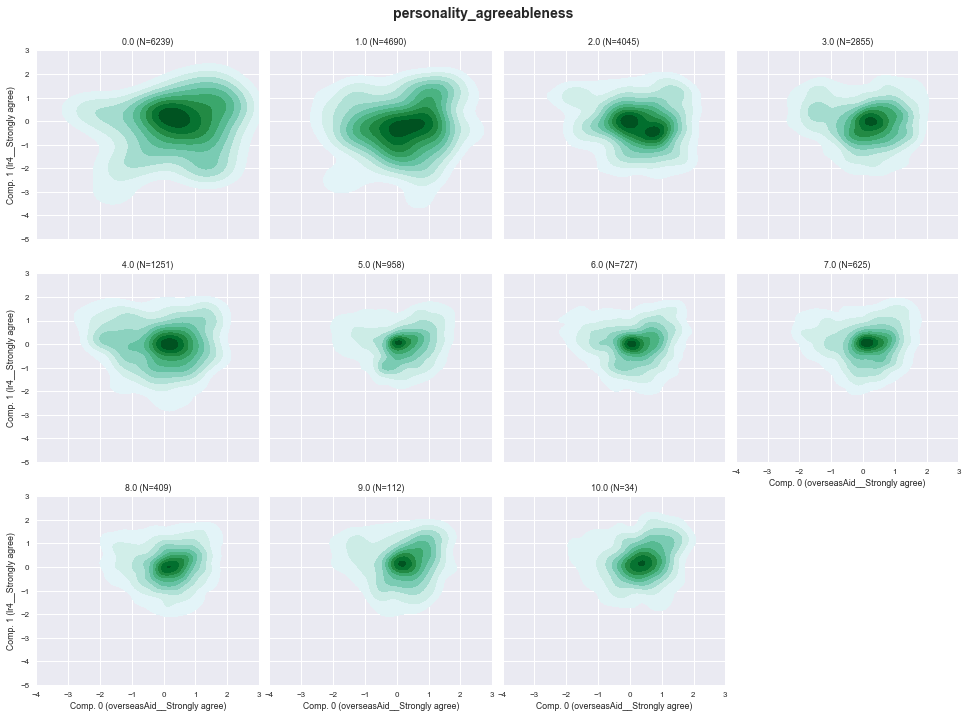

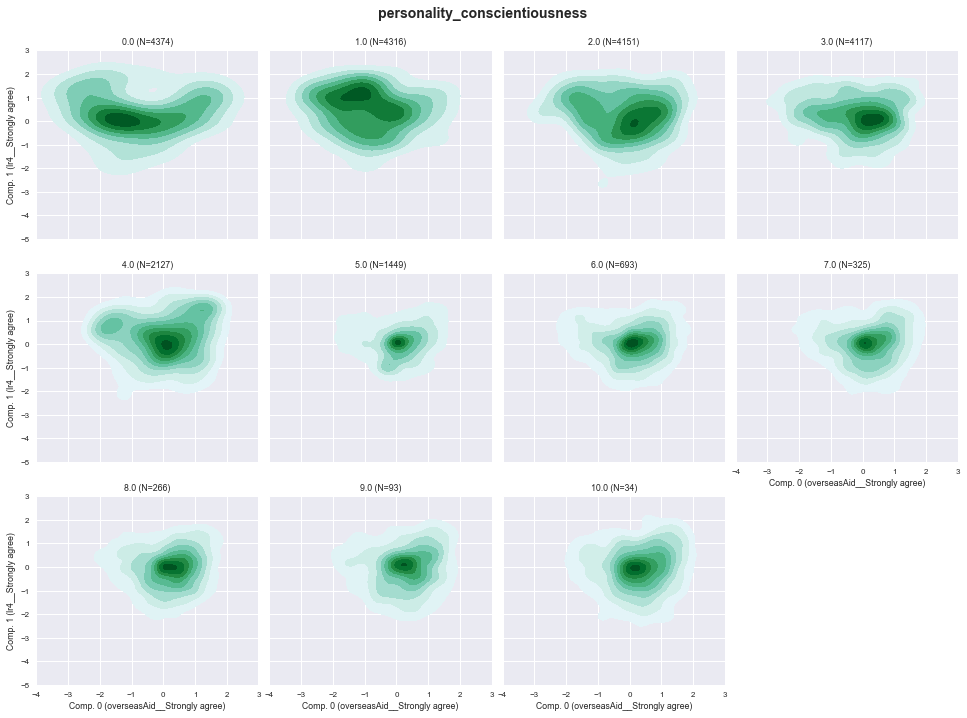

In [186]:
%%time

graph_type = "ordinal_kde/"
folder = output_subfolder + decomp_method +os.sep+ graph_type
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = var_type[ [ x in [ 0 ] for x in var_type["type"]  ] ].index # , 1, 2, 5, 6

sns.set(font_scale=.8)

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered',
                            'country_of_residence1','country_of_residence2',
                           'polKnowMiliband', 'polKnowClegg',
       'polKnowOsborne', 'polKnowMay', 'polKnowBercow',
'polKnowKerryW9',
       'polKnowHollandeW9', 'polKnowNetanyahuW9', 'polKnowPutinW9',
       'polKnowMerkelW9', 'polKnowAssadW9', 
       'ns_sec', 'EUMIICategory', 'age', 'Age', 'euRefExpectation',
       'country_of_residence2', 'country_of_residence1', 'profile_lea',
       'profile_oslaua', 'pano',
                           'EUMIICategory']:
        continue
    
#     col = "euRefVote"
#     fig = plt.figure( figsize=(16,10) )
    col = decomp_label_col

    df = BES_decomp.loc[ BES_numeric[col].notnull(),
                         [x_axis,y_axis] ].copy()
    max_cols = 4

#     # get category labels for categorical variables
#     if var_type.loc[label_stub,"type"] in [ 1, 2, 5, 6 ]:
#         cats = cat_dictionary[ label_stub ]
#         labels = ( cats[0], str(0), cats[-1], str(len( cats ) - 1) )
#     elif var_type.loc[label_stub,"type"] in [ 0 ]:
#         vals = BES_reduced.loc[ BES_decomp.index , decomp_label_categories[0] ].values
#         labels = ( "min val", min(vals), "max val", max(vals) )
#     else:
#         raise Exception('var_type not in [ 0, 1, 2, 5, 6]')    
    
    if var_type.loc[col,"type"] in [ 1, 2, 5, 6 ]:
    
        # reduce length of subcategories
        cats = list(cat_dictionary[col])
        for catno in range( len( cats ) ):

            words = cats[catno].split(" ")
            word_array = np.array( [len(x) for x in words] ) + 1
            max_words = np.where( np.cumsum( word_array )<30 )[0].max()
            cats[catno] = " ".join( words[0:max_words+1] )
        # NOTE - can cause problems if 2+ truncated subcategories are identical

        # add a category column to split the graphs on
        df[col] = BES_numeric[col].astype('category').cat.rename_categories( cats )

        # add N=??? sample size to each category type!
        sample_sizes = df[col].value_counts().loc[cats].values        
    elif var_type.loc[col,"type"] in [ 0 ]:
        df[col] = BES_numeric[col].astype('category')
        cats = [str(x) for x in df[col].cat.categories]
        # add N=??? sample size to each category type!
        sample_sizes = df[col].value_counts().values          
    else:
        raise Exception('var_type not in [ 0, 1, 2, 5, 6]')          
        

    cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
    df[col].cat.rename_categories( cat_plus_sample_sizes, inplace=True )

    # formatting
    n_cols = len(df[col].dropna().unique())
    n_rows = np.ceil(n_cols/max_cols)
    col_wrap = min(max_cols,n_cols)
    size = 13.5/col_wrap

    # make the actual graphs
    g = sns.FacetGrid(df, col=col,size=size,col_wrap=col_wrap)  
    g.map(sns.kdeplot, x_axis, y_axis, shade=True, shade_lowest=False).set_titles("{col_name}")

    plt.xlim(xlim)
    plt.ylim(ylim)   
    # plt.xlim(-3, 3)  
    # plt.ylim(-3, 3)

    # labels and title
    plt.subplots_adjust( top = 1-( .05 + .01*n_rows ) )
    g.set_xlabels( comp_labels[x_axis] )
    g.set_ylabels( comp_labels[y_axis] ) 
    g.fig.suptitle(col, fontsize=14, fontweight='bold')

    # save to file
    g.savefig(folder +os.sep+ col+"_kde", bbox_inches='tight')
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1

In [187]:
# BES_reduced_with_na["happyEULeave__Extremely happy"].notnull()
# BES_decomp.loc[ BES_reduced_with_na["happyEULeave__Extremely happy"].notnull() , [x_axis,y_axis] ]

Wall time: 10min 43s


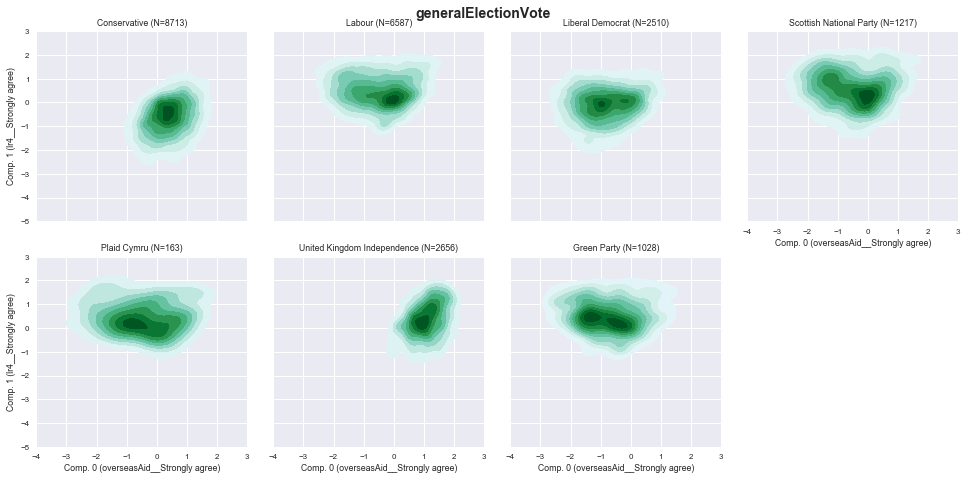

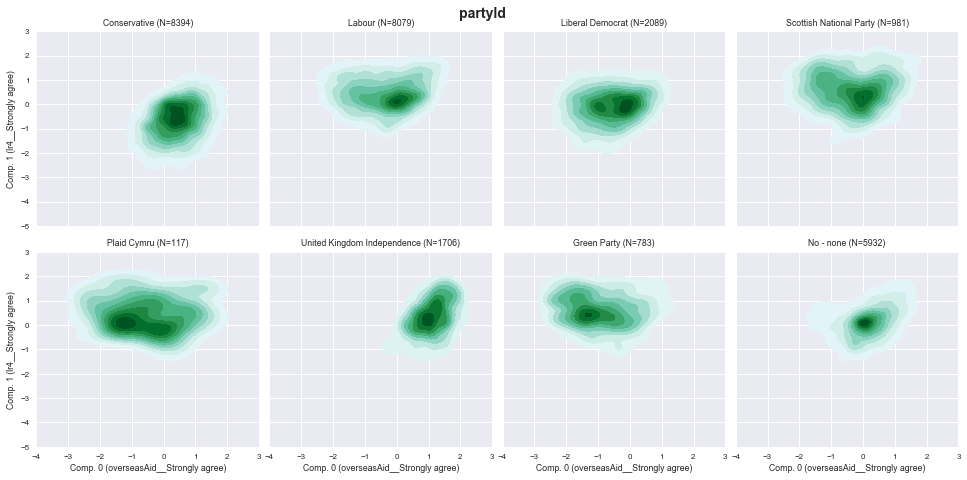

In [188]:
%%time
# 10 minutes!
max_cats = 30 # maximum number of categories

graph_type = "non_ordinal_kde/"
folder = output_subfolder + decomp_method +os.sep+ graph_type
if not os.path.exists(folder):
    os.makedirs(folder)

dummy_list = var_type[ var_type["type"]==3 ].index

sns.set(font_scale=.8)

# non-ordinal categories
fig_no = 0
for decomp_label_col in dummy_list:
    if decomp_label_col in ["profile_religion","country",
                            'polKnowMay','polKnowOsborne',
                            'polKnowClegg', 'polKnowBercow',
                            'polKnowMiliband', 'registered',
                            'country_of_residence1','country_of_residence2',
                           'polKnowMiliband', 'polKnowClegg',
       'polKnowOsborne', 'polKnowMay', 'polKnowBercow',
'polKnowKerryW9',
       'polKnowHollandeW9', 'polKnowNetanyahuW9', 'polKnowPutinW9',
       'polKnowMerkelW9', 'polKnowAssadW9', 
       'ns_sec', 'EUMIICategory', 'age', 'Age', 'euRefExpectation',
       'country_of_residence2', 'country_of_residence1', 'profile_lea',
       'profile_oslaua', 'pano',
                           'EUMIICategory']:
        continue
    
#     col = "euRefVote"
#     fig = plt.figure( figsize=(16,10) )
    col = decomp_label_col

    df = BES_decomp.loc[ BES_numeric[col].notnull(),
                         [x_axis,y_axis] ].copy()
    max_cols = 4

    # reduce length of subcategories
    # so it only contains categories *that exist in this column*
    cats = list( cat_dictionary[col][ list(BES_numeric[col].astype('category').cat.categories.astype('int')) ] )
    
    num_cats = len( cats )
    
    if num_cats > max_cats:
        print(col,"has more than max_cats categories",max_cats,"so skipping")
        continue
    
    for catno in range( num_cats ):

        words = cats[catno].split(" ")
        word_array = np.array( [len(x) for x in words] ) + 1
        max_words = np.where( np.cumsum( word_array )<30 )[0].max()
        cats[catno] = " ".join( words[0:max_words+1] )
    # NOTE - can cause problems if 2+ truncated subcategories are identical

    # add a category column to split the graphs on
    df[col] = BES_numeric[col].astype('category').cat.rename_categories( cats )

    # add N=??? sample size to each category type!
    sample_sizes = df[col].value_counts().loc[cats].values
    cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
    df[col].cat.rename_categories( cat_plus_sample_sizes, inplace=True )

    # formatting
    n_cols = len(df[col].dropna().unique())
    n_rows = np.ceil(n_cols/max_cols)
    col_wrap = min(max_cols,n_cols)
    size = 13.5/col_wrap

    # make the actual graphs
    g = sns.FacetGrid(df, col=col,size=size,col_wrap=col_wrap)  
    g.map(sns.kdeplot, x_axis, y_axis, shade=True, shade_lowest=False).set_titles("{col_name}")

    plt.xlim(xlim)
    plt.ylim(ylim)   
    # plt.xlim(-3, 3)  
    # plt.ylim(-3, 3)

    # labels and title
    plt.subplots_adjust( top = 1-( .05 + .01*n_rows ) )
    g.set_xlabels( comp_labels[x_axis] )
    g.set_ylabels( comp_labels[y_axis] ) 
    g.fig.suptitle(col, fontsize=14, fontweight='bold')

    # save to file
    g.savefig(folder +os.sep+ col+"_kde", bbox_inches='tight')
    if fig_no >1:
        plt.close()
    fig_no = fig_no + 1

In [189]:
# %debug

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


Wall time: 24.3 s


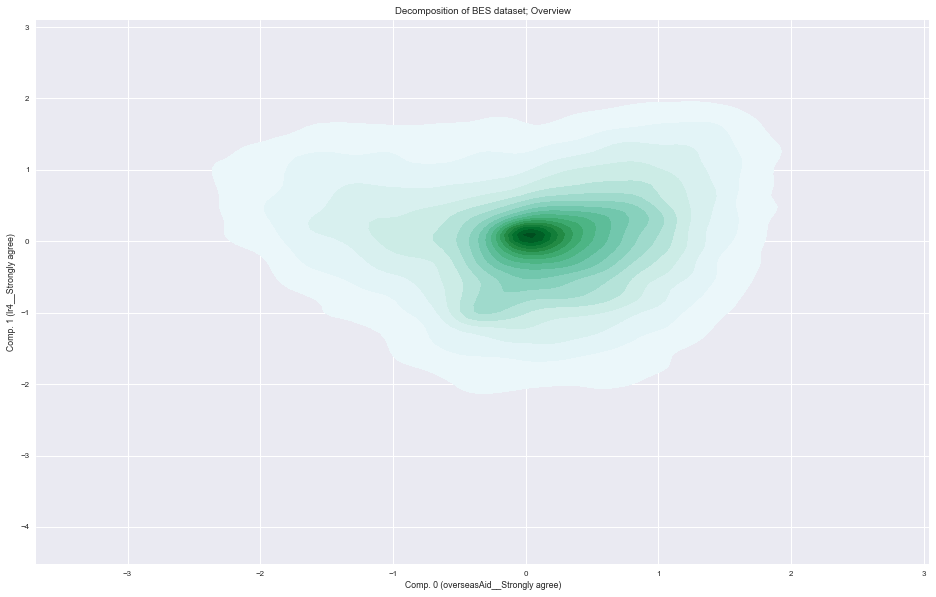

In [190]:
%%time
# col = "edlevel"

# df = BES_decomp.loc[ : , [x_axis,y_axis] ].copy()
# max_cols = 4

# # reduce length of subcategories
# cats = list(cat_dictionary[col])
# for catno in range( len( cats ) ):

#     words = cats[catno].split(" ")
#     word_array = np.array( [len(x) for x in words] ) + 1
#     max_words = np.where( np.cumsum( word_array )<25 )[0].max()
#     cats[catno] = " ".join( words[0:max_words+1] )


# add a category column to split the graphs on
# df[col] = BES_numeric[col].astype('category').cat.rename_categories( cats )

# # add N=??? sample size to each category type!
# sample_sizes = df[col].value_counts().loc[cats].values
# cat_plus_sample_sizes = ["".join([x," (N=", str(y),")"]) for x,y in zip(cats, sample_sizes)]
# df[col].cat.rename_categories( cat_plus_sample_sizes, inplace=True )

# # formatting
# n_cols = len(df[col].dropna().unique())
# n_rows = np.ceil(n_cols/max_cols)
# col_wrap = min(max_cols,n_cols)
# size = 13.5/col_wrap

# make the actual graphs
# g = sns.FacetGrid(df, col=col,size=size,col_wrap=col_wrap)  
fig = plt.figure( figsize=(16,10) )
sns.kdeplot(BES_decomp.loc[ : , [x_axis,y_axis] ],
            shade=True, shade_lowest=False, n_levels=20) #, shade=True, shade_lowest=False)
# g.set_titles("{col_name}")

# plt.xlim(xlim)
# plt.ylim(ylim)   
# plt.xlim(-3, 3)  
# plt.ylim(-3, 3)

# labels and title
# plt.subplots_adjust( top = 1-( .05 + .01*n_rows ) )
# g.set_xlabels( comp_labels[x_axis] )
# g.set_ylabels( comp_labels[y_axis] ) 
# g.fig.suptitle(col, fontsize=14, fontweight='bold')
plt.xlabel( comp_labels[x_axis] )
plt.ylabel( comp_labels[y_axis] ) 
plt.title('Decomposition of BES dataset; Overview')
# save to file
fig.savefig(output_subfolder + decomp_method + os.sep + "overview"+"_kde", bbox_inches='tight')

In [46]:
# %%time
# # Load BES Panel for Wave 8
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3.dta") # 130Mb
# #(31409, 733)

# # BES_Panel = pd.read_stata(BES_data_folder+BES2015_W8_v1.6.dta")

# print( BES_Panel.shape )

In [47]:
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3.dta")
# weights = BES_Panel['wt_full_W8']
# print(weights.shape)

# samples = BES_decomp.loc[ : , [x_axis,y_axis] ]
# samples = np.swapaxes(samples,0,1)
# print(samples.shape)

In [48]:
# #create mesh grid
# x = np.linspace(xlim[0], xlim[1], 100)
# y = np.linspace(ylim[0], ylim[1], 100)
# xx, yy = np.meshgrid(x, y)

In [49]:
# #Evaluate the kde on a grid
# pdf = gaussian_kde(samples.values, weights=weights.values)
# zz = pdf((np.ravel(xx), np.ravel(yy)))
# zz = np.reshape(zz, xx.shape)

In [50]:
# gc.collect()

In [51]:
# kwargs = dict(extent=(xlim[0], xlim[1], ylim[0], ylim[1]), cmap='hot', origin='lower')

In [52]:
# plt.figure()
# plt.imshow(zz, **kwargs)
# plt.title('kde')
# plt.tight_layout()
# plt.show()

In [53]:
# from matplotlib import mlab, cm
# levels = np.arange(0, 0.16, 0.01)  # Boost the upper limit to avoid truncation errors.
# norm = cm.colors.Normalize(vmax=abs(zz).max(), vmin=-abs(zz).max())
# cmap = cm.PRGn
# cset1 = plt.contourf(xx, yy, zz, levels,
#                  cmap=cm.get_cmap(cmap, len(levels) - 1),
#                  norm=norm,
#                  )

In [28]:
%%time
BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
# weights = BES_Panel['wt_full_W8']

wt_var = 'wt_full_' + dataset_name.split("_")[0]

if wt_var in BES_Panel.columns:
    weights = BES_Panel[wt_var].dropna()
    print(weights.shape)

    # samples = BES_decomp.loc[ : , [x_axis,y_axis] ]
    samples = BES_decomp.loc[ BES_Panel[wt_var].notnull() , [x_axis,y_axis] ]
    samples = np.swapaxes(samples,0,1)
    print(samples.shape)


    weighted_kde(xlim, ylim, samples, weights)

(30319,)
(2, 30319)


TypeError: 'module' object is not callable

In [ ]:
# thresh = .2
# counts = BES_numeric.count()
# mostly_not_filled_out = counts[counts<= (counts.max()*thresh)].index
# # mostly_filled_out     = counts[counts>  (counts.max()*thresh)].index
# W9_vars = pd.Index([x for x in BES_numeric.columns if "W9" in x])

# many_cat_drop_list = ['Age', 'EUMIICategory', 'age', 'country_of_residence1',
#        'country_of_residence2', 'euRefExpectation', 'ns_sec', 'pano',
#        'profile_lea', 'profile_oslaua']

# high_corr_drop_list = ['ageGroup', 'euRefVote2', 'euRefVotePost', 'euRefVoteUnsqueeze',
#        'recallVote15', 'voted2015']

# very_low_var = ['partyContactLD_6', 'partyContactLD_7', 'partyContactUKIP_1']

# BES_reduced = BES_numeric.copy()
# BES_reduced.drop(W9_vars,               axis=1, inplace=True, errors='ignore')
# BES_reduced.drop(mostly_not_filled_out, axis=1, inplace=True, errors='ignore')
# # BES_reduced.drop(many_cat_drop_list   , axis=1, inplace=True, errors='ignore')
# BES_reduced.drop(high_corr_drop_list  , axis=1, inplace=True, errors='ignore')
# BES_reduced.drop(very_low_var         , axis=1, inplace=True, errors='ignore')
# print(BES_reduced.shape)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn; seaborn.set() # set plot style

# https://github.com/jakevdp/wpca
# https://github.com/jakevdp/wpca/blob/master/WPCA-Example.ipynb
from wpca import PCA, WPCA, EMPCA

(30319,)
0.0252110840523 26.0779799926


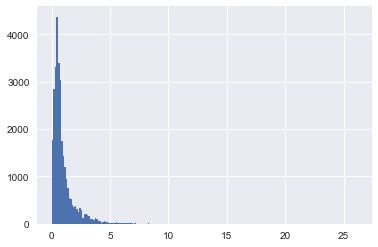

In [52]:
# BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W8_v1.3.dta")
# weights = BES_Panel['wt_full_W8']
row_weights = BES_non_numeric[wt_var].copy()#.dropna()
#BES_Panel['wt_full_W8'].dropna()

# there's a nan right at this point and nowhere else!
row_weights.loc[5987] = 1.0

print(row_weights.shape)

# # samples = BES_decomp.loc[ : , [x_axis,y_axis] ]
# samples = BES_decomp.loc[ BES_Panel['wt_core_W8'].notnull() , [x_axis,y_axis] ]
# samples = np.swapaxes(samples,0,1)
# print(samples.shape)


demographic_moderator = 1

row_weights = ((row_weights-1)/demographic_moderator) + 1


row_weights.hist(bins=200)
print( row_weights.min(),row_weights.max() )

In [60]:
# subsample
# BES_reduced = BES_reduced_with_na[BES_reduced_with_na.columns[0:200]][0:30000].copy()

# BES_reduced = BES_reduced_with_na.copy()
# BES_reduced = BES_reduced.copy()
missing_value_matrix = BES_reduced_with_na.notnull().astype('int')
missing_value_matrix[missing_value_matrix==0] = 0.01


In [61]:
# multiply binary null/notnull matrix by the weights for each row (individual)
weights = missing_value_matrix.apply(lambda x: x*row_weights)
# weights = BES_reduced.notnull().astype('int') # just missing values
# weights = missing_value_matrix
weights = weights/weights.mean().mean()

In [62]:
clean_feature_set_std = StandardScaler().fit_transform(BES_reduced.values )

In [63]:
# "weightPCAreduced_withPP/" - 2% reduced data
# "weightPCAreduced_withPP/"
# Treatment = "weightPCAuptodate"
# Treatment = "sklearnPCAuptodate"
# Treatment = "weightPCAuptodate_weights_just_missing_values"
# Treatment = "EMPCAuptodate_weights_just_missing_values"
# Treatment = "EMPCA_W10_only"
Treatment_weighted = Treatment+os.sep+"wpca"
if not os.path.exists(BES_data_folder+Treatment_weighted):
    os.makedirs(BES_data_folder+Treatment_weighted)

In [64]:
weights

lr1__Strongly agree  lr2__Strongly agree  lr3__Strongly agree  \
0                 0.094209             0.094209             0.094209   
1                 0.811043             0.008110             0.811043   
2                 9.512983             9.512983             9.512983   
3                 0.227814             0.227814             0.227814   
4                 0.696255             0.696255             0.696255   
5                 0.453283             0.453283             0.453283   
6                 1.051474             1.051474             1.051474   
7                 0.565125             0.565125             0.565125   
8                 0.866183             0.866183             0.866183   
9                 2.289845             2.289845             2.289845   
10                0.180314             0.180314             0.180314   
11                0.455966             0.455966             0.455966   
12                0.679745             0.006797             0.006797   
13                0.226824             0.226824             0.226824   
14                1.054705             1.054705             1.054705   
15                0.946521             0.946521             0.946521   
16                1.055580             1.055580             0.010556   
17                0.220808             0.220808             0.220808   
18                1.376857             1.376857             1.376857   
19                0.632868             0.632868             0.632868   
20                2.224351             2.224351             2.224351   
21                0.191082             0.191082             0.191082   
22                0.676298             0.676298             0.676298   
23                0.727706             0.727706             0.727706   
24                1.521984             1.521984             1.521984   
25                1.128168             1.128168             1.128168   
26                0.172988             0.172988             0.172988   
27                0.294531             0.294531             0.294531   
28                1.003665             1.003665             1.003665   
29                0.137794             0.137794             0.137794   
...                    ...                  ...                  ...   
30289             0.632081             0.632081             0.632081   
30290             0.865242             0.865242             0.865242   
30291             0.715770             0.715770             0.715770   
30292             0.658501             0.658501             0.658501   
30293             0.747696             0.747696             0.747696   
30294             0.375998             0.375998             0.375998   
30295             1.397432             1.397432             1.397432   
30296             1.952747             1.952747             1.952747   
30297             1.530409             1.530409             1.530409   
30298             0.017498             1.749814             0.017498   
30299             0.870378             0.870378             0.870378   
30300             1.550369             1.550369             1.550369   
30301             0.950576             0.950576             0.950576   
30302             0.443811             0.443811             0.443811   
30303             5.657507             5.657507             5.657507   
30304             0.436179             0.436179             0.436179   
30305             7.206571             7.206571             7.206571   
30306             0.016309             0.016309             0.016309   
30307             0.933856             0.933856             0.933856   
30308             2.750133             2.750133             2.750133   
30309             0.557091             0.557091             0.557091   
30310             0.445194             0.445194             0.445194   
30311             4.770280             4.770280             4.770280   
30312             0.928458             0.928458

In [65]:
%%time
from wpca import WPCA, EMPCA
from sklearn.decomposition import PCA
BES_std = pd.DataFrame(      clean_feature_set_std,
                             columns = BES_reduced.columns,
                             index   = BES_reduced.index      )

# decomp = PCA(svd_solver='full')
# #decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#  #    n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# # decomp = SparsePCA(n_components=30, alpha=2,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
# #
# # alpha=2 -> 1hr
# decomp = FactorAnalysis(svd_method = 'lapack') ## ~10s ,n_components=30 -> 1.5 hrs
# # ,n_components=30
# PCA, WPCA, EMPCA
# decomp = PCA(n_components=10)
# decomp = EMPCA() # overnight!
# decomp = WPCA() # 21 minutes, 7min 54s (14min 34s) -> rubbish
# decomp = WPCA(n_components=10) # 6.2s -> rubbish
# decomp = WPCA(n_components=30) # 7min 22s -> rubbish
# decomp = EMPCA(n_components=10) # 6.2s # 20min 29s -> and rubbish
#decomp = EMPCA() # more than 8 hours - had to interrupt
# weights = []

# 20s with weights, 7mins with no weights (weird!)
decomp = EMPCA(n_components=4) # super slow!
#decomp = WPCA(n_components=4) #332ms # (n_components=30)
# decomp = PCA() # svd_solver='full' # 2s


decomp_method = str(decomp).split("(")[0]
# decomp_method = "EWPCA" # 21 minutes
if len(weights) ==0 or decomp_method == "PCA":
    kwds = {}
else:
    kwds = {'weights': weights}

X_r = decomp.fit_transform(BES_std, **kwds)
n_components = decomp.components_.shape[0]
BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = BES_reduced.index)


Wall time: 3min 7s


In [59]:
weights.values

array([[ 0.09429902,  0.09429902,  0.09429902, ...,  0.09429902,
         0.09429902,  0.09429902],
       [ 0.81181689,  0.        ,  0.81181689, ...,  0.81181689,
         0.81181689,  0.81181689],
       [ 9.52205589,  9.52205589,  9.52205589, ...,  9.52205589,
         9.52205589,  9.52205589],
       ..., 
       [ 2.2438899 ,  2.2438899 ,  2.2438899 , ...,  2.2438899 ,
         0.        ,  2.2438899 ],
       [ 2.13935795,  2.13935795,  2.13935795, ...,  2.13935795,
         0.        ,  2.13935795],
       [ 0.49908614,  0.49908614,  0.49908614, ...,  0.49908614,
         0.49908614,  0.49908614]])

In [44]:
subdir = BES_data_folder+"/"+Treatment+"/"+decomp_method+"/"
if not os.path.exists(subdir): os.makedirs(subdir)


explained variance ratio (first 30): [ 0.24751291  0.14274816  0.04909894  0.04534743]
explained variance (first 30): [ 10.05297774   5.79785546   1.9942012    1.8418299 ]


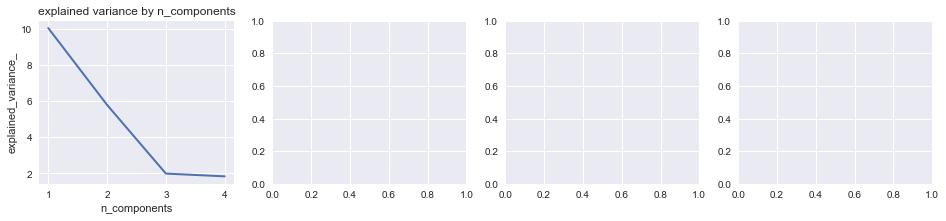

In [45]:
display_pca_data(n_components, decomp, BES_std)

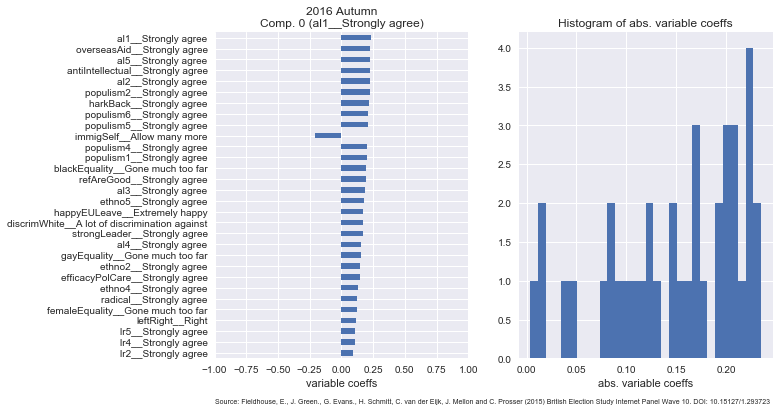

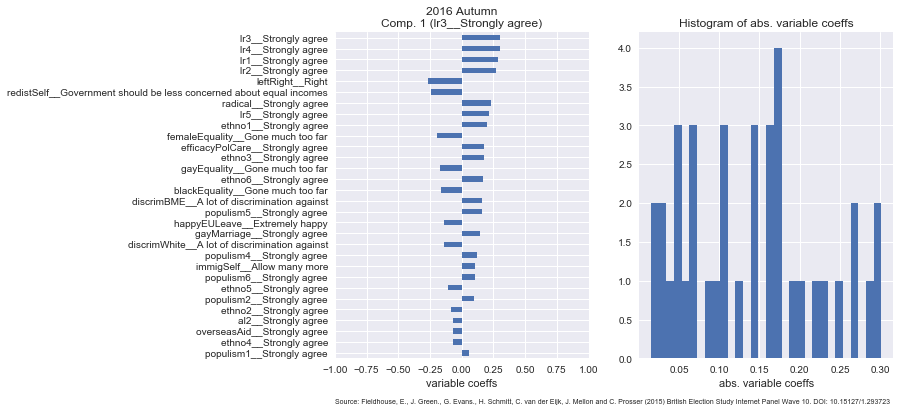

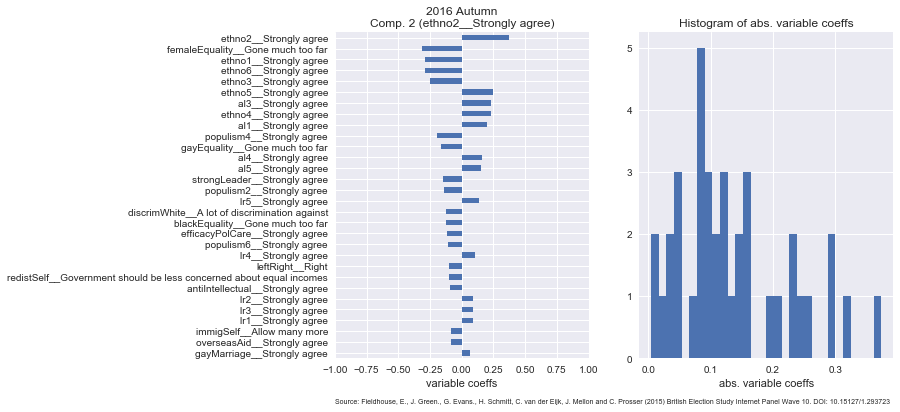

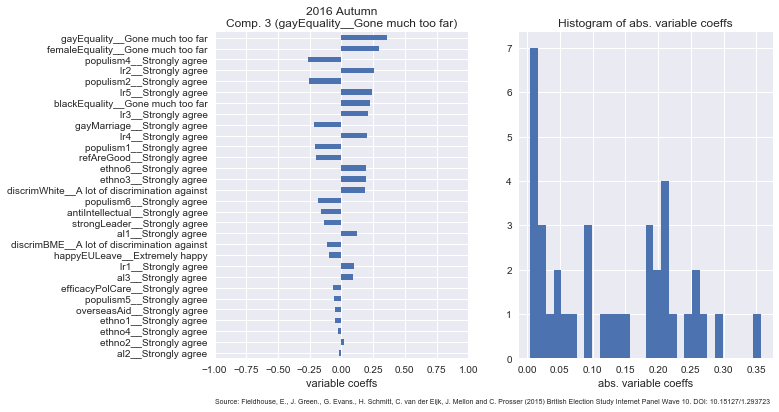

In [66]:
# %%time
# # BES_decomp, comp_labels, comp_dict = display_components(n_components, decomp, subdir, BES_reduced.columns, BES_decomp)
# (BES_decomp, comp_labels,comp_dict) = display_components(n_components, decomp.components_,
#                                                          subdir + os.sep, BES_reduced.columns, BES_decomp)

# treatdir = BES_data_folder+"W13_Lab_lost"
# if not os.path.exists(treatdir): os.makedirs(treatdir)

# decomp_method = str(decomp).split("(")[0] 
# decomp_method_subdir = treatdir + os.sep + decomp_method
# if not os.path.exists(decomp_method_subdir): os.makedirs(decomp_method_subdir)
    
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          BES_reduced.columns, BES_decomp, manifest,
                                                          save_folder = subdir, 
                                                          show_first_x_comps= 20, show_histogram = True)



In [ ]:
W5vars = [x for x in BES_reduced.columns if "W5" in x]

In [ ]:
len(W5vars)

In [ ]:
# W5corr = BES_non_numeric["CampaignDayW5"].corr( BES_reduced[W5vars] )
W5corr = BES_reduced[W5vars].corrwith(BES_non_numeric["CampaignDayW5"])
# BES_non_numeric["CampaignDayW5"].corr(  )

In [ ]:
W5corr.sort_values(ascending=False)

In [ ]:
var_list = W5corr.abs().sort_values(ascending=False).head(60).index

In [ ]:
[x for x in BES_reduced.columns if "likeBennett" in x]


In [ ]:
variable = 'likeBennettW5__Strongly like'
# "labPartnerSNPW5_Would join Labour"
crosstab = pd.crosstab(index   = BES_non_numeric[ "CampaignDayW5" ],
                       columns = BES_reduced[ variable ],
                       values  = BES_non_numeric[ "wt_daily_W5" ],
                       aggfunc = sum,
                       normalize='index')

x_axis = "Campaign Day"
y_axis = variable
x_dim = hv.Dimension(x_axis, values = crosstab.index)
y_dim = hv.Dimension(y_axis, unit = '%')#, soft_range = (0,100))
hv.Curve(crosstab.unstack() * 100,
                           kdims = [x_dim] ,
                           vdims = [y_dim] )

In [ ]:
( x for x in zip(range(0, int(BES_reduced[ variable ].max())),crosstab.columns) )

In [ ]:
hmap_of_curves =  hv.HoloMap(kdims=['$variable$'])

# var_list = ['likeBennettW5__Strongly like', "labPartnerSNPW5_Would join Labour"]
var_list = W5corr.abs().sort_values(ascending=False).head(60).index

for var_no in range(len(var_list)):
#     print(variable)
    variable = var_list[var_no]

    crosstab = pd.crosstab(index   = BES_non_numeric[ "CampaignDayW5" ],
                           columns = BES_reduced[ variable ],
                           values  = BES_non_numeric[ "wt_daily_W5" ],
                           aggfunc = sum,
                           normalize='index')
#     crosstab.columns = cat_dictionary[new_old_col_names[variable]]    

#     curves = hv.NdOverlay(key_dimensions=['$stuff$'] )
    
#     for value in range(0, 1+int(BES_reduced[ variable ].max()) ):
# #         col_variable = crosstab.columns[value]
#         curves[value] = hv.Curve(crosstab[value]*100,
#                                 kdims=['$x$'],
#                                 vdims=['$\\phi(x;stuff)$'], label = variable) 
#     hmap_of_curves[var_no] = curves
    col_variable = int(BES_reduced[ variable ].max())
    hmap_of_curves[var_no] = hv.Curve( crosstab[col_variable] * 100,
                                kdims=['$x$'],
                                vdims=['$\\phi(x;stuff)$'], label = variable)
    
hmap_of_curves

In [ ]:
    crosstab = pd.crosstab(index   = BES_non_numeric[ "CampaignDayW5" ],
                           columns = BES_reduced[ 'noChanceCoalitionLDW5_Yes' ],
                           values  = BES_non_numeric[ "wt_daily_W5" ],
                           aggfunc = sum,
                           normalize='index')

In [ ]:
[x for x in BES_reduced.columns if "Age" in x]